## **** ||  Binary Classification -  Logistic Regression || ****

## Classification:

Classification is the process of categorizing the given set of data into different classes.It is about predicting the qualitative output. It can only take values from a finite set due to the qualitative output. It basically predicts the category 
that the data belong to.

For eg : Spam filters which determines whether the email is spam or not spam ,  predicting the breed of the dog , etc.

Classification comes under   $supervised$ $learning$.


There are different types of classification and one of the type is $Binary$ $classification$.
 

## Supervised Learning:

Supervised  Learning is a machine learning task where an algorithm is trained to find the pattern

It is the task of learning a function that maps an input to an output based on example of input-output pairs. 

## Binary Classification

It is a type of classification with two outcomes.

It is the  process of classifying an example into a set of two classes using a $classifier$.


## Logistic Regression

In logistic regression outcome is measured with a dichotomous variable , which means it will have only two possible outcomes.

In binary logistic regression the target variables must be binary and the desired outcome is represented by 0 or 1.

It is useful to understand how a set of independent varaible affect the outcome of dependent variable.

Here the predicted value is categorical.

It is a special case of $linear$ $regression$ . The difference is instead of fitting  a line to the data , logistic regression fits a 
'S' shaped "$logistic$ $function$" which is also called as "$Sigmoid$ $Function$".


   Sigmoid function  
    
  $  f(x) = \frac {1}{1 + e^-1} $
  
  
  * It can take any real valued number and map it into value between 0 and 1. 
  * If the curve goes positive infinity , prediction will become 1.
  * if the curve goes negative infinity the prediction will become 0.
  * If the output of the sigmoid function is  more than 0.5 we classify it as 1 and when the sigmoid funtion is less than 0.5 ,     we classify it as 0.

### Below is the example of logistic regression

In [20]:
import numpy as np
import pandas as pd                                         #importing all the necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")                  #reading the dataset

In [4]:
# Here using this dataset we have to predict whether the person will buy a car or not. 
# The following dataset can be downloaded from kaggle.com

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


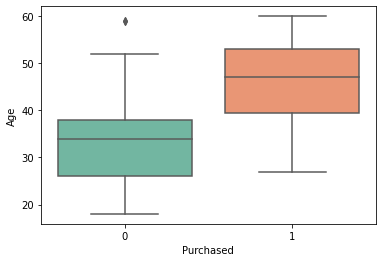

In [24]:
sns.boxplot(x="Purchased", y="Age", data=df, palette='Set2' )
plt.show()

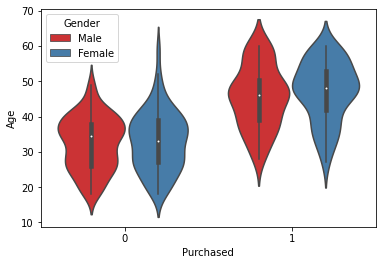

In [29]:
sns.violinplot(x="Purchased", y="Age",hue="Gender", data=df, palette='Set1')
plt.show()

In [6]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:,4].values

In [7]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)    #train-test-split

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 2)
(300,)
(100, 2)
(100,)


In [11]:
y_train.ndim

1

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()                                            #feature scaling for better accuracy
X_train = sc_X.fit_transform(X_train)                          #as there is a huge difference between age and estimated salay
X_test = sc_X.transform(X_test)

In [13]:
lg = LogisticRegression()                                     #training logistic regression

In [14]:
lg.fit(X_train,y_train)

LogisticRegression()

In [15]:
prediction = lg.predict(X_test)                                        #model evaluation

In [16]:
print(X_test)
print(prediction)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

In [17]:
ac  = accuracy_score(y_test,prediction)                    #accuracy
ac

0.89

In [18]:
from sklearn.metrics import confusion_matrix                           #confusion matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

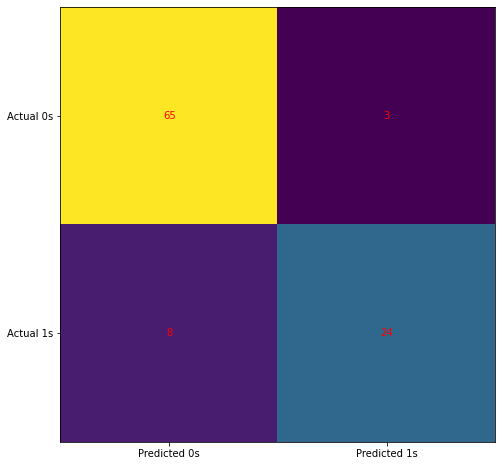

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))                 
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [45]:
rm =(((cm.T)/(cm.sum(axis=1))).T) #Recall
rm

array([[0.95588235, 0.04411765],
       [0.25      , 0.75      ]])

In [48]:
from sklearn.metrics import recall_score
rec = recall_score(y_test,prediction, average = 'micro')             #recall matrix
rec

0.89

In [49]:
pm =(cm/cm.sum(axis=0)) #Precision 
pm

array([[0.89041096, 0.11111111],
       [0.10958904, 0.88888889]])

In [50]:
from sklearn.metrics import precision_score                             #precision matrix
prec = precision_score(y_test,prediction, average = 'micro')
prec

0.89

In [51]:
F1 = 2*pm*rm/(pm+rm)                                                  #f1 score

In [53]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,prediction, average = 'micro')
f1

0.89

$The$ $model$ $accomplished$ 89% $accuracy$